# 회귀를 통해 classification이 아닌 특정 값을 예측하는 방법들

# K-최근접 이웃 회귀
* K-최근접 이웃 분류와 비슷하게, 근접한 이웃들을 가지고 평균 값으로 값을 예측하는 것
* 직관적이지만, 가장 큰 문제는 **훈련 데이터 셋 바깥의 값의 경우 엉뚱하게 예측**하게 된다 (ex. 데이터에는 80cm 농어가 최대인데 예측하려는 농어가 100cm 라면? 많아봤자 80cm 농어의 무게로 값이 예측될 것)

In [3]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fish.csv')

## 농어의 무게를 예측하기 위한 회귀모델 만들기
* 길이를 활용해서 무게를 예측하려고 하는 것이기 때문에 target 값이 weight, input이 length

In [9]:
# numpy 배열로 준비
perch_length = df.loc[df['Species'] == 'Perch', 'Length2'].to_numpy()
perch_weight = df.loc[df['Species'] == 'Perch', 'Weight'].to_numpy()

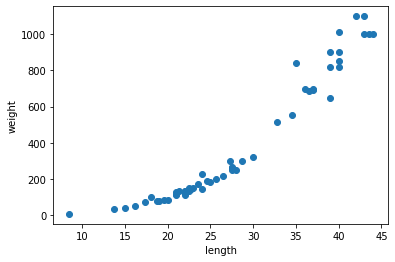

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 크기가 커짐에 따라서 무게가 늘어나는데, 살짝 exponential한 구간들이 있다

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
# 가로로 긴 array 형태로 나온다. 그런데 학습을 시키기 위해서는 세로로 긴 열 1개가 있는 2차원 배열로 바꿔줘야 한다 (k-최근접 이웃 분류에서도 2차원 배열로 진행했음)
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

### 넘파이 배열의 차원을 수동으로 바꾸기
* 2차원 배열로 수동으로 바꿔 주어야 하는데, reshape을 활용하면 된다
* 자동으로 행 개수를 선택해주기 위해서는 -1을 첫 값으로, 그 뒤엔 열 개수를 지정해주면 된다

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array) # 4개 원소가 있던 1차원 배열을 2개 열의 2차원 배열로 변경
print(test_array.shape)

(4,)
[[1 2]
 [3 4]]
(2, 2)


In [ ]:
train_input = train_input.reshape(-1,1) # 자동으로 행 개수를 원소만큼 나열해줄 수 있도록 -1로 지정
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### k-최근접 이웃 회귀 학습 & 성능 평가
* knr에서의 score는 결정계수 **R Squared**
* **mean_absolute_error**을 활용하면 예측값과 실제값 사이의 절댓값 오차들을 구하고 평균을 내준다
* `과대적합` : test set을 가지고 예측했을 때 그 성능이 현저히 낮은 경우\
`과소적합` : train set을 가지고 예측했을 때 결정계수가 더 낮거나 둘 다 낮은 경우, 학습이 제대로 되지 않은 것으로 판단

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# knr에서의 score는 결정계수 R Squared를 의미함, 여기서 99% 가까이 나왔으므로 높은 성능
print(knr.score(test_input, test_target))

from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input) #개별 예측값들을 구함
mae = mean_absolute_error(test_prediction, test_target) #target 값과의 절댓값 오차들의 평균을 구함
print(mae)

0.9928094061010639
19.157142857142862


In [ ]:
print(knr.score(train_input, train_target)) #train set으로 score를 구했을 때 더 낮기 때문에 과소적합

0.9698823289099255


### 과소적합 해결하기
* n_neighbors를 수를 줄이면 국지적인 데이터의 패턴 (훈련세트 내에 있는 패턴)에 둔감해지기 때문에 과소적합을 해결할 수 있다

In [ ]:
knr.n_neighbors = 3 # k-최근접 이웃 분류와 동일하게 n_neighbors를 활용해 근접 이웃 숫자를 줄여주었다

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


train R squared : 0.9852830341215901
test R squared : 0.991309195814175


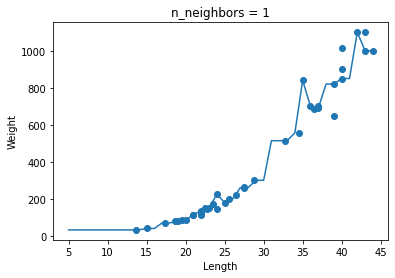

train R squared : 0.9698823289099255
test R squared : 0.9928094061010639


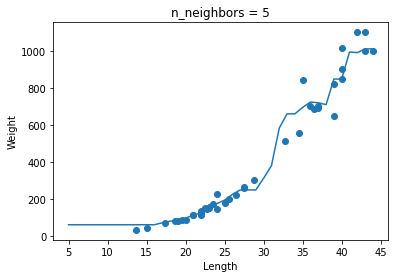

train R squared : 0.9616456902604301
test R squared : 0.9737908255822255


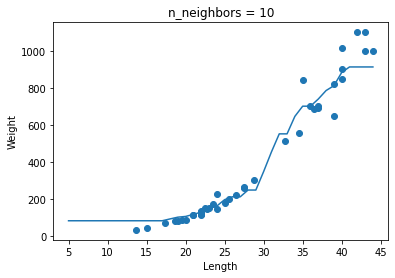

In [ ]:
x = np.arange(5, 45).reshape(-1,1) # 5센치부터 45센치까지 길이를 담은 2차원 배열 생성

for n in [1, 5, 10]: # n_neighbors 개수에 따라서 scatter plot 그리기
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  train_score = knr.score(train_input, train_target)
  test_score = knr.score(test_input, test_target)
  print('train R squared : '+ str(train_score))
  print('test R squared : '+ str(test_score))

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction) #실선으로 그리기 위한 plot
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('Length')
  plt.ylabel('Weight')
  plt.show()

# n값이 커질수록 모델이 점점 단순화된다 -> 과소적합에 가까워짐

# 선형 회귀
* 선형 회귀 라이브러리 sklearn.linear_model LinearRegression
* 이런 식으로 최적의 파라미터를 찾는게 **모델 기반 학습**, 훈련 세트를 저장했다가 근접한걸 뱉어내는 k근접을 **사례기반 학습**이라고 함

In [ ]:
distances, indexes = knr.kneighbors([[50]])
print(knr.predict([[50]]))
print(np.mean(train_target[indexes])) # 위에서 언급한 k-최근접 회귀의 문제점, 가장 가까운 데이터들의 평균을 구하는 것이므로 out of range면 이상하게 예측함

[912.5]
912.5


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]])) # 위의 912.5g으로 예측한 것과 다르게 훨씬 큰 1241g으로 예측되었다

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_) 
# y = 39.017x -709.0186 이라는 회귀식이 완성됨, 이 값들을 모델 파라미터라고 부름

[39.01714496] -709.0186449535477


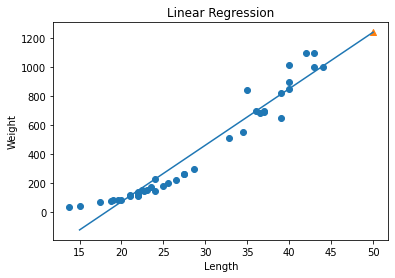

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) #길이 15랑 50인걸 회귀식에 넣어서 1차 방정식 그래프를 그렸다
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) #하지만 막상 score를 구해보면 전반적으로 점수가 낮고 test score가 더 낮은 과대적합 모습도 보임

0.9398463339976039
0.8247503123313558


# 다항 회귀
* 다항식을 활용한 다항회귀, 최적의 곡선을 찾기 위해서 **독립변수에 제곱한 값을 추가 변수로 활용**할 수 있다
* column_stack을 활용해서 제곱한 값과 기존 값 (독립변수)를 2차원 2개열의 배열로 만들어서 학습시키는 것, 그러나 target 값은 그대로!

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [ ]:
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_) #변수가 2개가 되었다 (독립변수 길이와 길이의 제곱)

[  1.01433211 -21.55792498] 116.05021078278276


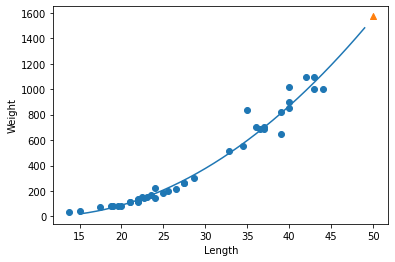

In [ ]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 -21.6*point+116.05)
plt.scatter(50, 1573.98, marker = '^')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) #test set의 R제곱이 아직 좀 더 높기 때문에 과소적합의 문제가 사라지지 않았음

0.9706807451768623
0.9775935108325122


# 다중회귀
* 다항 회귀가 한 개의 특성으로 여러 항을 만드는 것이라면, 다중회귀는 여러 개의 변수 (특성)을 가지고 하는 회귀분석

## 특성 공학
* 각 변수들을 그대로 사용하는 것이 아니라 **더욱 적합한 형태로 변환해 주는 것 (변수의 제곱값, 변수간의 곱 등, 더미변수화 등)** 을 회귀 분석의 변수로 활용하는 것
* 이것을 하는 이유는 도메인 지식을 활용하여 모델의 성능을 더 개선할 수 있는 변수를 찾아가기 위함
* PolyNomialFeatures 변환기를 사용하면 **각 특성을 제곱한 항과 특성끼리 곱한 항**을 추가한다

In [7]:
# 다중회귀에서 사용할 높이와 두께 변수가 추가된 2차원 배열

perch_full = pd.read_csv('https://bit.ly/perch_csv_data').to_numpy()
perch_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

### PolynomialFeatures 사용 기본 방법

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(train_input) # 변환기를 train 데이터로 학습시켜주고
train_poly = poly.transform(train_input) # 변환해주는 과정까지 진행해야 함
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)
print(poly.get_feature_names()) #어떤 항목들이 추가되었는지 확인

(42, 10)
(14, 10)
['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) #그냥 다항회귀에서 진행했을 때, train_set의 점수가 낮았던 과소 적합 문제가 해결되었다

0.9903183436982124
0.9714559911594084


### PolynomialFeatures의 특성 추가하기

In [17]:
poly = PolynomialFeatures(degree=5) #degree를 지정하면 최대 몇 제곱항 까지 조정할 지 정할 수 있다
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 56)


In [20]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 5제곱까지 변수를 늘려 주었을 때는 과대적합의 문제점이 나오는 것

0.9999999999999998
-144.40489131900623


## 규제 (라쏘와 릿지)
* 규제란 **머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하게 하는 것**. 기울기를 줄여주는 과정을 말한다
* 릿지와 라쏘 모두 **각 변수에 규제를 가하는 것**인데, 각각 변수들이 위에서 곱, 제곱 등으로 모두 그 크기가 천차만별이기 때문에 **미리 z-score standardization을 진행해서 표준화** 해줄 필요가 있다

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) # 여기서도 마찬가지로 train set을 가지고 test set을 표준화해준다
print(train_scaled.shape) # 55개 변수 (1 제외) 모두 활용

(42, 56)


### 릿지 회귀
* alpha 값으로 각 변수에 규제의 강도를 지정해줄 수 있다 (클 수록 강도 높음)
* 적절한 alpha값은 사람이 직접 찾아야 하는데, 이런 걸 하이퍼파라미터라고 한다

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target)) #위에서 55개 변수로 회귀 진행 시 test set 점수에서 마이너스 값이었던 것이 제대로 돌아왔다

0.9896101671037343
0.9790693977615398


In [28]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

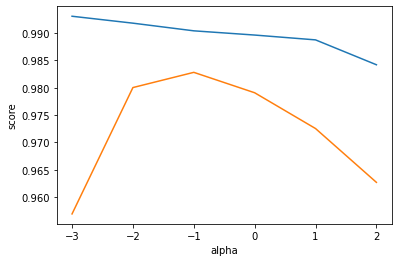

In [29]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

## 라쏘 회귀
* 라쏘 회귀가 릿지와 다른 점은 **계수 값을 아예 0으로 만들 수 있다는 것**이다. 중요치 않은 feature를 알아서 걸러내는 용도로 사용할 수 있다

In [31]:
from sklearn.linear_model import Lasso
lasso= Lasso()

In [35]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


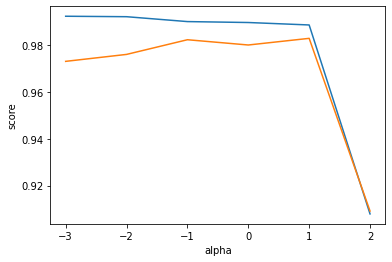

In [36]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [37]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [38]:
print(np.sum(lasso.coef_ == 0)) # 56개 중 41개의 변수는 계수가 0이다, 즉 사용되지 않은 변수들인 것

41
